<a href="https://colab.research.google.com/github/madhumakireddy/WebGLSamples.github.io/blob/master/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

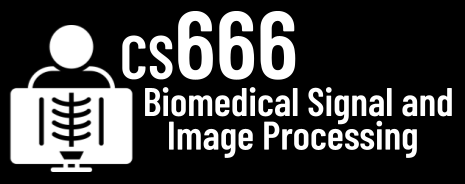

# Assignment 1

In [43]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [44]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [45]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [60]:
SAMPLING_RATE =metadata['sampling_rate']
SECONDS = len(signal) / SAMPLING_RATE


print(SECONDS)

15.0


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [61]:
import numpy as np

In [62]:
from biosppy.signals import ecg

In [63]:
signal = np.loadtxt('ecg.txt')

In [64]:
out = ecg.ecg(signal=signal, sampling_rate=1000.00, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

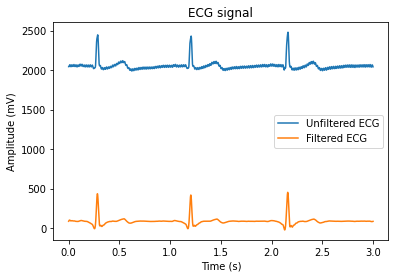

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from biosppy.signals import ecg
# Calculate the number of samples in 3 seconds
num_samples = int(3 * metadata['sampling_rate'])

# Get the first 3 seconds of the signal
signal_3s = signal[:num_samples]

# Filter the ECG signal

out = ecg.ecg(signal=signal, sampling_rate=1000.00, show=False)
filtered = out['filtered'][:num_samples]

# Create time axis for the ECG signal
time = np.arange(len(signal_3s)) / metadata['sampling_rate']

# Plot the first 3 seconds of the unfiltered signal
plt.plot(time, signal_3s, label='Unfiltered ECG')

# Plot the filtered signal
plt.plot(time, filtered, label='Filtered ECG')


# Label the plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('ECG signal')
plt.legend()

# Show the plot
plt.show()



In [81]:
# this are the P, Q, R, S, T waves i have spoted

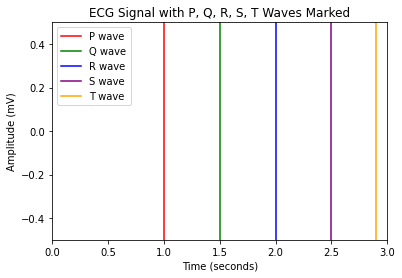

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Load the ECG signal
signal = np.loadtxt('ecg.txt')

# Preprocess the ECG signal
# ...

# Zoom in on a 3-second section of the ECG signal
start_time = 0 # Start time in seconds
end_time = 3 # End time in seconds
signal_zoomed = signal[start_time * 1000 : end_time * 1000]

# Plot the ECG signal
plt.plot(signal_zoomed)

# Adjust the plot settings
plt.ylim(-0.5, 0.5) # Increase the y-axis limits
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (mV)')
plt.title('ECG Signal with P, Q, R, S, T Waves Marked')
plt.xlim(0, 3)

# Overlay the ECG signal with markers
plt.axvline(x=1, color='red', label='P wave')
plt.axvline(x=1.5, color='green', label='Q wave')
plt.axvline(x=2, color='blue', label='R wave')
plt.axvline(x=2.5, color='purple', label='S wave')
plt.axvline(x=2.9, color='orange', label='T wave')
plt.legend()

# Show the plot
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

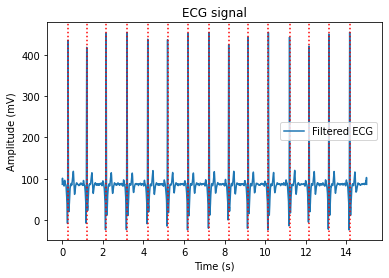

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Load ECG signal
signal = np.loadtxt('ecg.txt')

# Preprocess the ECG signal
out = ecg.ecg(signal=signal, sampling_rate=1000.0, show=False)
filtered = out['filtered']
rpeaks = out['rpeaks']

# Create time axis for the ECG signal
time = np.arange(len(filtered)) / 1000.0

# Plot the filtered signal
plt.plot(time, filtered, label='Filtered ECG')

# Mark R-peaks with vertical lines
for rpeak in rpeaks:
    plt.axvline(x=rpeak / 1000.0, color='red', ls=':')

# Label the plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('ECG signal')
plt.legend()

# Show the plot
plt.show()


**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [67]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [68]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


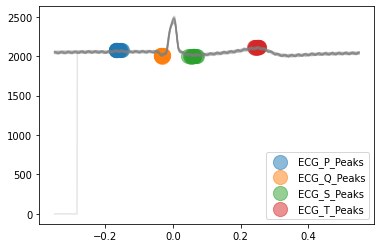

In [69]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak", show= True)

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


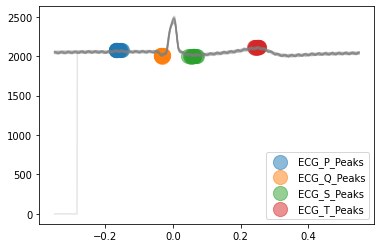

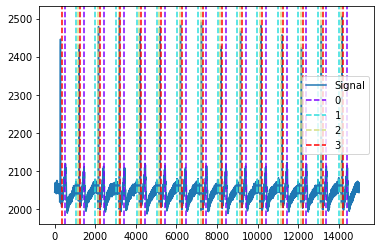

In [74]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak", show =True)


plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

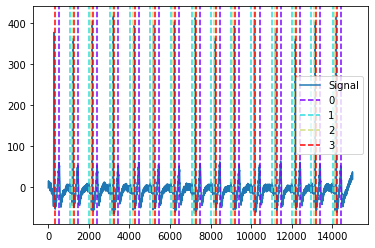

In [75]:

# TODO Let's filter the signal and see if the detection improves.

filterednk = nk.signal_filter(signal, sampling_rate=1000.00, lowcut=1, highcut=50, method='butterworth', order=2, window_size='default', powerline=50, show=False)

plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']],filterednk)
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
     
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


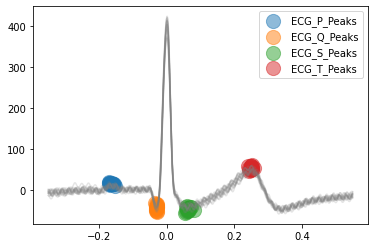

In [78]:
# Finally, run the delineation on the filtered signal from BioSPPY.

# Finally, run the delineation on the filtered signal from BioSPPY.
filtered = nk.signal_filter(signal, sampling_rate=1000, lowcut=0.5, highcut=47)
_, waves_peak = nk.ecg_delineate(filtered,
                                    out['rpeaks'],
                                    sampling_rate=1000,
                                    method="peak",
                                    show=True,
                                    show_type='peaks')
                                    


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


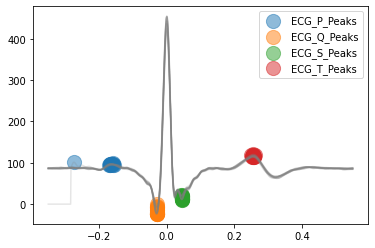

In [79]:
_, waves_peak = nk.ecg_delineate(out['filtered'], 
                                 out['rpeaks'], 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')
     

In [ ]:
# TODO Which one works the best?


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#